In [2]:
""" Cardekho Dataset
Load Data and Write script to perform following operations.
1. Consider the above data and perform preprocessing.
2. Perform basic EDA for data analysis.
3. Perform feature engineering to select appropriate features.
4. Construct multiple linear regression model
5. Evaluate the model with appropriate metrics
6. Generate the results
"""

' Cardekho Dataset\nLoad Data and Write script to perform following operations.\n1. Consider the above data and perform preprocessing.\n2. Perform basic EDA for data analysis.\n3. Perform feature engineering to select appropriate features.\n4. Construct multiple linear regression model\n5. Evaluate the model with appropriate metrics\n6. Generate the results\n'

In [3]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # To split dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For preprocessing
from sklearn.linear_model import LinearRegression  # For building regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation


In [4]:
#load data
df=pd.read_csv(r"C:\Users\DRG\Downloads\datasets\cardekho_dataset.csv")
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:

df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
#check missing values
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [7]:
#check data types
print(df.dtypes)

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object


In [8]:
data=df.select_dtypes(include=["object"]).columns
data

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

In [9]:
#remove duplicates entries
df.drop_duplicates(inplace=True)

In [10]:
# da=pd.get_dummies(df,columns=['brand','model'],drop_first=True)
# we r not going to do this because many cols are incresing ,which increases dimensinality

In [11]:
# now we are going to use label encoding to this data 
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object #initialize
le=LabelEncoder()
# Apply Label Encoding to categorical columns
 # fit transform converts categorical to 

df['seller_type']=le.fit_transform(df['seller_type'])
df['fuel_type']=le.fit_transform(df['fuel_type'])
df['transmission_type']=le.fit_transform(df['transmission_type'])
df['brand']=le.fit_transform(df['brand'])
df['model']=le.fit_transform(df['model'])
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,1,Hyundai Grand,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,2,Hyundai i20,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,3,Maruti Alto,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,4,Ford Ecosport,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


# EDA

In [12]:
df.describe()

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,15.235092,62.197391,6.036338,5.561648e+04,0.392252,2.474272,0.793265,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,8.053460,36.322097,3.013291,5.161855e+04,0.510743,1.523609,0.404977,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,8.000000,26.000000,4.000000,3.000000e+04,0.000000,1.000000,1.000000,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,18.000000,62.000000,6.000000,5.000000e+04,0.000000,1.000000,1.000000,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,18.000000,92.000000,8.000000,7.000000e+04,1.000000,4.000000,1.000000,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,31.000000,119.000000,29.000000,3.800000e+06,2.000000,4.000000,1.000000,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [13]:
#1)Check unique values
print(df['fuel_type'].unique())  # Shows: ['Petrol', 'Diesel', 'CNG']


[4 1 0 3 2]


In [14]:
#Visualize how prices are distributed
#sns.histplot(df['selling_price'],bins=20,kde=True)

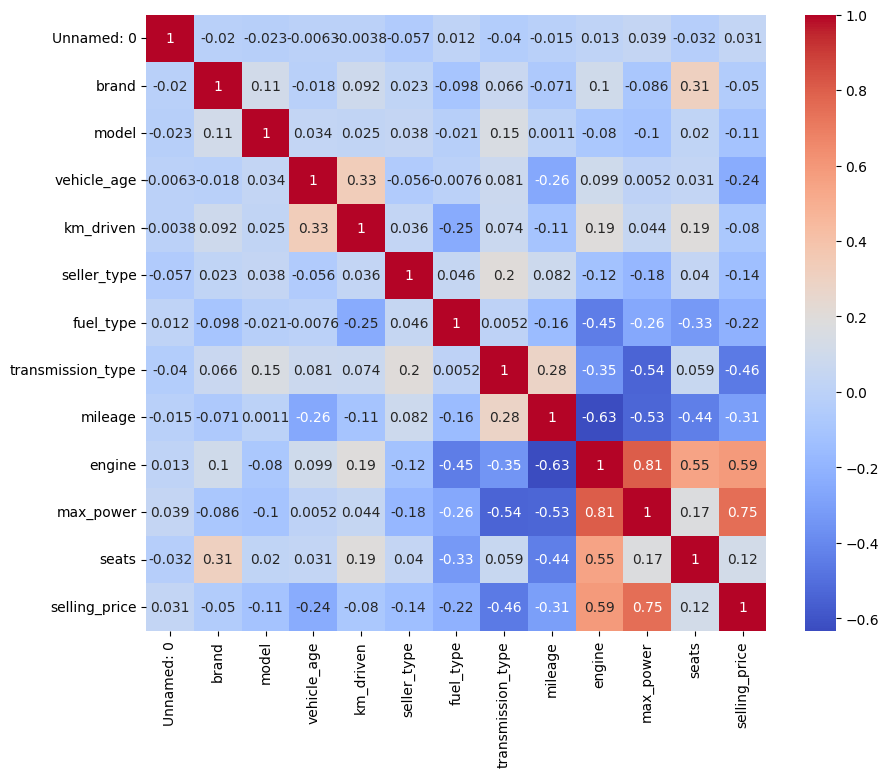

In [15]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")#annot menas numerical values 
plt.show()
#df.corr(): Calculates correlation between features.
#High correlation between independent features and the target (selling_price) means they are useful for prediction.

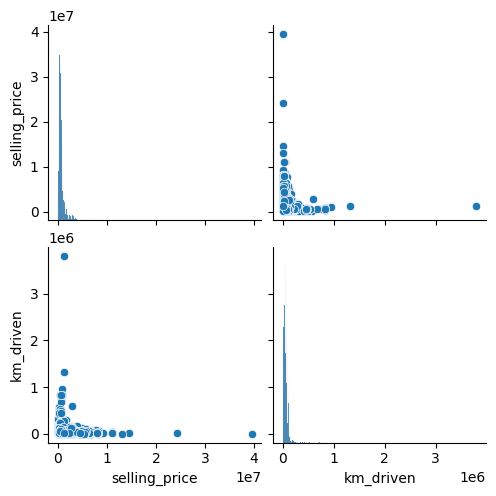

In [16]:
sns.pairplot(df,vars=['selling_price', 'km_driven'])

plt.show()

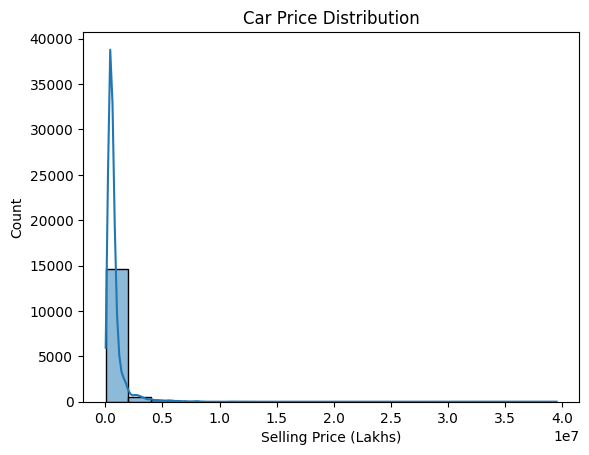

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['selling_price'], bins=20, kde=True)
plt.xlabel("Selling Price (Lakhs)")
plt.title("Car Price Distribution")
plt.show()


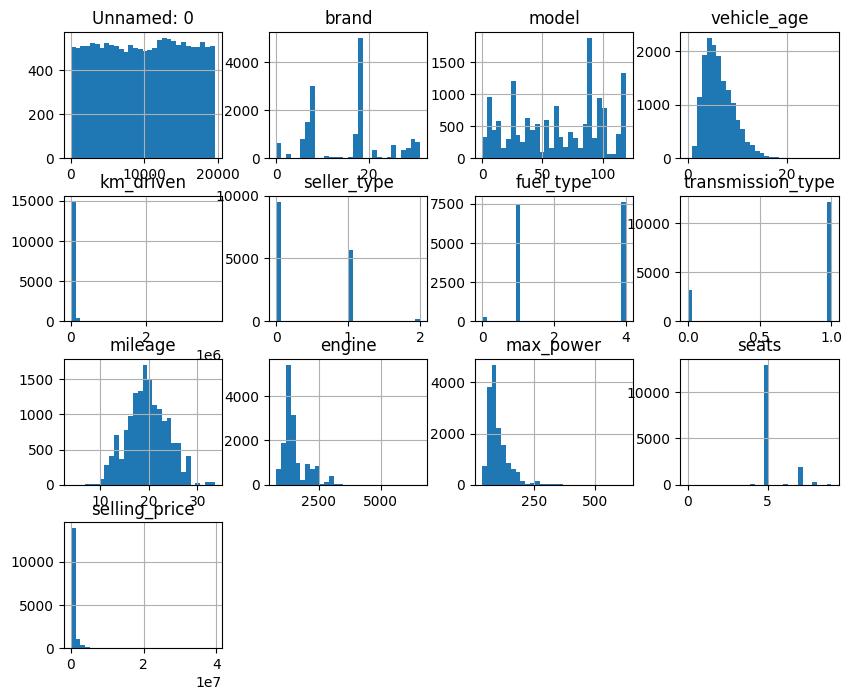

In [18]:
df.hist(figsize=(10,8),bins=30)
plt.show()

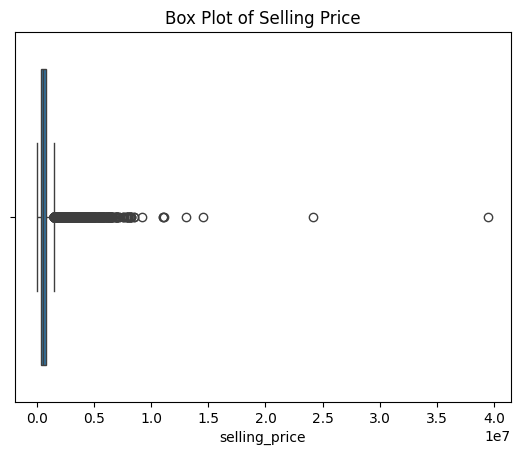

In [19]:
#Outlier Detection (Box Plot)
#We check if some cars have extremely high or low prices compared to others.
sns.boxplot(x=df['selling_price'])
plt.title("Box Plot of Selling Price")
plt.show()


# feature engineering

Feature engineering means selecting the most important variables that will help in predicting car prices.
1)Remove Unnecessary Columns
Some columns, such as car names, may not help in prediction:


In [24]:
df=df.drop(['car_name'],axis=1)

2) Convert Categorical Features into Numeric (Encoding)
Convert categorical variables like Fuel_Type, Transmission, Seller_Type into numeric values using One-Hot Encoding.

In [25]:
#df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Seller_Type'], drop_first=True) already done

3) Feature Scaling (Normalize Data if Needed)
If some features have large differences in scale, apply normalization.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])



In [29]:
df.head()

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,18,7,9,1.247335,1,4,1,19.70,796,46.30,5,-0.732548
1,1,8,54,5,-0.690016,1,4,1,18.90,1197,82.00,5,-0.251618
2,2,8,118,11,0.084924,1,4,1,17.00,1197,80.00,5,-0.626296
3,3,18,7,9,-0.360667,1,4,1,20.92,998,67.10,5,-0.613993
4,4,6,38,6,-0.496281,0,1,1,22.77,1498,98.59,5,-0.229249


 4: Construct Multiple Linear Regression Model
 
Multiple Linear Regression is a predictive modeling technique where multiple independent variables are used to predict a dependent variable (Selling Price).

1)Split the Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['selling_price'])  # Independent variables
y = df['selling_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2)Train the Multiple Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

3)Check Model Coefficients and Intercept

In [32]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -1.6655836641380026
Coefficients: [-5.21645068e-07  1.90007269e-03 -6.09108956e-04 -6.75074842e-02
 -6.92678053e-02 -4.45132809e-03 -7.05338521e-03 -1.16782936e-01
  1.60914177e-02  9.56393148e-05  1.68216367e-02  8.91760417e-03]


5: Evaluate the Model with Appropriate Metrics

We need to measure how well the model is performing using evaluation metrics.

1)Predict the Values on Test Data

In [35]:
 y_pred = model.predict(X_test)

2)Calculate Model Performance Metrics

Mean Absolute Error (MAE): Measures the average absolute error.
Mean Squared Error (MSE): Measures the squared average error.
R-Squared (R²): Explains how well the independent variables explain the dependent variable.

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-Squared Score (R²):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.3131489801806377
Mean Squared Error (MSE): 0.31718583474316014
R-Squared Score (R²): 0.6631657536629463


1)Compare Actual vs. Predicted Prices

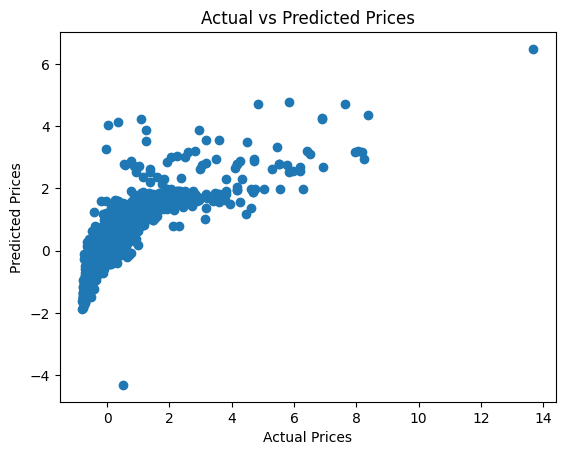

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
